### Improting Libraries

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

### Define Face Detection Function

In [4]:
# Load the pre-trained face detector model
detector = dlib.get_frontal_face_detector()

def detect_faces_in_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape

    # Detect faces using dlib's detector
    faces = detector(img, 1)

    # Extract and return face coordinates if any faces are found
    face_locations = []
    for face in faces:
        # Calculate face size as a percentage of the image size
        face_width = face.right() - face.left()
        face_height = face.bottom() - face.top()
        face_size = (face_width * face_height) / (width * height)

        if face_size >= 0.001:  # Check if face size is at least 0.1% of the image
            face_locations.append(face)

    return face_locations

### Face Detection for One Image

Detected faces:
 - Face at coordinates: (2377, 692), (3176, 1491)


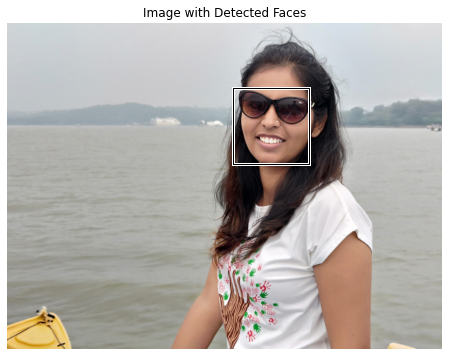

In [6]:
image_path = r'G:\Computer_Vision\Data\Goa\P_20211015_160650.jpg'
face_locations = detect_faces_in_image(image_path)

if face_locations:
    print("Detected faces:")
    for face_location in face_locations:
        x = face_location.left()
        y = face_location.top()
        right = face_location.right()
        bottom = face_location.bottom()
        print(f" - Face at coordinates: ({x}, {y}), ({right}, {bottom})")

    # Read the image in color for visualization
    img = cv2.imread(image_path)

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a matplotlib figure and plot the image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title("Image with Detected Faces")

    # Draw rectangles around detected faces
    for face_location in face_locations:
        x = face_location.left()
        y = face_location.top()
        right = face_location.right()
        bottom = face_location.bottom()
        # Draw white outline
        plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='white', linewidth=3, fill=False))
    
        # Draw red inner rectangle
        plt.gca().add_patch(plt.Rectangle((x, y), right - x, bottom - y, edgecolor='black', linewidth=1, fill=False))

    plt.axis('off')  # Hide matplotlib axes
    plt.show()

else:
    print("No faces detected in the image.")

### Face Detection for Entier Folder

In [12]:
def save_detected_faces(image_path, faces_detected_dir, faces_not_detected_dir):
    face_locations = detect_faces_in_image(image_path)

    # Read the image in color
    img = cv2.imread(image_path)

    if face_locations:
        # Draw rectangles around detected faces
        for face_location in face_locations:
            x = face_location.left()
            y = face_location.top()
            right = face_location.right()
            bottom = face_location.bottom()

            # Draw white outline
            cv2.rectangle(img, (x, y), (right, bottom), (255, 255, 255), 3)

            # Draw black inner rectangle
            cv2.rectangle(img, (x, y), (right, bottom), (0, 0, 0), 1)

        # Save the image with detected faces
        output_path = os.path.join(faces_detected_dir, os.path.basename(image_path))
    else:
        # Save the image without detected faces
        output_path = os.path.join(faces_not_detected_dir, os.path.basename(image_path))

    cv2.imwrite(output_path, img)

def process_images_in_directory(directory_path):
    parent_dir = os.path.dirname(directory_path)
    faces_detected_dir = os.path.join(parent_dir, "v0.1_data", "faces_detected")
    faces_not_detected_dir = os.path.join(parent_dir, "v0.1_data", "faces_not_detected")

    if not os.path.exists(faces_detected_dir):
        os.makedirs(faces_detected_dir)
    if not os.path.exists(faces_not_detected_dir):
        os.makedirs(faces_not_detected_dir)

    for filename in tqdm(os.listdir(directory_path)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            save_detected_faces(image_path, faces_detected_dir, faces_not_detected_dir)

directory_path = r'G:\Computer_Vision\Data\Goa'
process_images_in_directory(directory_path)


100%|██████████| 80/80 [04:22<00:00,  3.29s/it]
